In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

**Maestría en Inteligencia Artificial Aplicada**


Materia: Proyecto Integrador
Profesor titular: Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales

ASESOR - PROYECTO INTEGRADOR ABR25
Dr. Carlos Villaseñor



Equipo 10
David García Robles - A01152606
David Nava Jiménez - A01168501
José Antonio Hernández Hernández - A01381334

In [7]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Métricas
from sklearn.metrics import mean_squared_error, r2_score

# Modelado y validación
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    KFold,
    RepeatedKFold,
    RepeatedStratifiedKFold,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline


In [9]:
df = pd.read_csv('C:/Users/david/GitRepo/modelo-ventas-nmp/data/raw/new_df_afterPCA_1.csv')

In [10]:
df.head(5)

,PC1,PC2,PC3,PC4,PC5,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,...,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9,DIAS_ALMONEDA
0,0.263398,-0.234472,-0.129190,0.576329,-0.310379,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0
1,0.264760,-0.237999,-0.206347,0.567476,-0.300945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0
2,0.270882,-0.233092,-0.114559,0.578582,-0.337764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0
3,0.239039,-0.249443,-0.463313,0.785727,0.098385,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
4,0.217479,-0.254239,-0.576575,0.740370,0.095825,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,21.0


In [11]:
df.shape

(1047304, 143)

In [12]:
df = df.dropna()

In [13]:
df.shape

(1047304, 143)

Comentarios: A continuación vamos a particionar el dataframe en los datos que van a entrenar el modelo, validar y el testing. Como primer paso dejamos la variable objetivo a parte del dataframe de variables predictoras.

In [14]:
X = df.drop(df[['DIAS_ALMONEDA']],axis=1)
X

,PC1,PC2,PC3,PC4,PC5,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,...,VALUADOR_0,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9
0,0.263398,-0.234472,-0.129190,0.576329,-0.310379,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.264760,-0.237999,-0.206347,0.567476,-0.300945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.270882,-0.233092,-0.114559,0.578582,-0.337764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.239039,-0.249443,-0.463313,0.785727,0.098385,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.217479,-0.254239,-0.576575,0.740370,0.095825,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047299,0.291404,-0.225574,0.018622,0.604773,-0.396036,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1047300,0.278722,-0.235380,-0.163890,0.582498,-0.322596,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1047301,0.306887,-0.213667,0.238974,0.631411,-0.485269,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1047302,0.316440,-0.214007,0.226761,0.639259,-0.484765,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [15]:
y =df[['DIAS_ALMONEDA']].copy()
y

,DIAS_ALMONEDA
0,31.0
1,31.0
2,31.0
3,29.0
4,21.0
...,...
1047299,4.0
1047300,4.0
1047301,4.0
1047302,4.0


A continuación vamos a realizar una partición 70-15-15 en entrenamiento, validación y prueba respectivamente.

In [16]:
Xtrain, xtemp, ytrain, ytemp = train_test_split(X, y, test_size =.30, random_state=27)
Xval,Xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size= 0.5, random_state=27)   # División en train y test (80% entrenamiento, 20% prueba) — permite evaluar el modelo con datos no vistos

In [17]:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(733112, 142) (733112, 1)
(157096, 142) (157096, 1)
(157096, 142) (157096, 1)


Comentarios. Como primer propuesta vamos a entrenar y evaluar un modelo de regresión lineal y podremos revisar si sus métricas son adecuadas

Vamos a evaluar el modelo con las métricas,raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$).

In [18]:
print("Valores mínimos:")
print("ytrain min:", ytrain.min().values[0])
print("yval min:", yval.min().values[0])

print("Valores nulos:")
print("ytrain nulls:", ytrain.isnull().sum().values[0])
print("yval nulls:", yval.isnull().sum().values[0])


Valores mínimos:


ytrain min: -20.0
yval min: -19.0
Valores nulos:
ytrain nulls: 0
yval nulls: 0


In [19]:

scaler = StandardScaler()                                                            # Aplicamos StandardScaler para normalizar las variables predictoras
Xtrain_scaled = scaler.fit_transform(Xtrain)                                         # Algunos modelos como regresión lineal son sensibles a la escala
Xval_scaled = scaler.transform(Xval)

mask_train = ytrain['DIAS_ALMONEDA'].values >= 0                                     # Eliminamos entradas con valores negativos en DIAS_ALMONEDA para evitar problemas al aplicar logaritmo
mask_val = yval['DIAS_ALMONEDA'].values >= 0

Xtrain_valid = Xtrain_scaled[mask_train]
ytrain_valid = np.log1p(ytrain['DIAS_ALMONEDA'].values[mask_train])                  # Aplicamos log1p para estabilizar la varianza y mejorar la distribución

Xval_valid = Xval_scaled[mask_val]
yval_valid_raw = yval['DIAS_ALMONEDA'].values[mask_val]
yval_valid_log = np.log1p(yval_valid_raw)

In [20]:
lr_model = LinearRegression()                                                      # Instanciar y entrenar modelo de regresión lineal
lr_model.fit(Xtrain_valid, ytrain_valid)

y_pred_log = lr_model.predict(Xval_valid)                                          # Predecir en el conjunto de validación (escalado)


y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=700)                    # Evitar overflow numérico al aplicar la transformación inversa (expm1)
y_pred = np.expm1(y_pred_log_clipped)                                              # Revertir la transformación logarítmica para regresar a la escala original de días
y_pred = np.clip(y_pred, a_min=0, a_max=1000)                                      # Limitar valores extremos en la predicción final

In [21]:
mse = mean_squared_error(yval_valid_raw, y_pred)                                   # Calcular el error cuadrático medio (MSE)
rmse = np.sqrt(mse)                                                                # Calcular la raíz del error cuadrático medio (RMSE)
r2 = r2_score(yval_valid_raw, y_pred)                                              # Calcular el coeficiente de determinación R2
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2: {r2:.4f}')

MSE: 15309.9442
RMSE: 123.7334
R2: 0.1549


RMSE: 123.73 días
En promedio, el modelo tiene un error de 123 días al predecir la cantidad de días que un artículo tarda en llegar a almoneda. Esta métrica es útil y directamente interpretable, ya que se encuentra en la misma escala que la variable objetivo.

R2: 0.1549
El modelo explica solo el 16.9% de la varianza total de la variable DIAS_ALMONEDA. Aunque es mejor que un modelo aleatorio o un baseline constante, este valor indica que hay muchas otras variables o factores no capturados por el modelo que influyen en el comportamiento del tiempo hacia almoneda.

Vamos a utilizar validación-cruzada, por lo que vamos a concatenar los conjuntos de entrenamiento y validación para utilizarlo como entrenamiento

In [22]:
Xtrainval = pd.concat([Xtrain,Xval],axis =0)                                      # Unir Xtrain y Xval en un solo conjunto de entrenamiento ampliado
ytrainval = pd.concat([ytrain,yval],axis=0)                                       # Unir ytrain y yval en el mismo orden para obtener los targets completos

In [23]:
print(Xtrainval.shape, ytrainval.shape)

(890208, 142) (890208, 1)


Posterior a esto, vamos a proponer una función llamada "mis modelos" incluyendo los modelos que vamos a comparar y vamos a ajustar los parámetros para buscar el mejor modelo

In [24]:
def mis_modelos():
    modelos, nombres = list(), list()

    #ElasticNet
    modelos.append(ElasticNet(alpha=0.1, l1_ratio=0.5, tol=0.01, random_state=27))
    nombres.append('ElasticNet')


    #Árbol de Decisiones
    modelos.append(DecisionTreeRegressor(max_depth=15, max_features=5, min_samples_split=5, random_state=27))
    nombres.append('Dtree')

    #Random Forest
    modelos.append(RandomForestRegressor(n_estimators=15, max_depth=10, max_features=20, random_state=27))
    nombres.append('RandomF')

    #XGBoosting
    modelos.append(XGBRegressor(n_estimators=20, max_depth=10, learning_rate=0.1, subsample=1.0,
                                 booster='gbtree', objective='reg:squarederror', random_state=27))
    nombres.append('XGBoost')



    return modelos, nombres

#Posteriormente vamos a entrenar cada uno de los modelos y vamos a desplegar las métricas de Train y val

modelos, nombres = mis_modelos()
resultados =list()




cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=27)

for modelo, nombre in zip(modelos, nombres):
    pipeline = Pipeline(steps=[('modelo', modelo)])

    scores = cross_validate(pipeline,
                            Xtrain_valid,
                            ytrain_valid,
                            scoring='r2',
                            cv=cv,
                            return_train_score=True,
                            n_jobs=1)

    resultados.append(scores)

    #Desplegamos los valores de las métricas para verificar si no hay subentrenamiento o sobreentrenamiento
    print(f">> {nombre}")
    print(f"\tTrain R2: {np.mean(scores['train_score']):.3f} ± {np.std(scores['train_score']):.3f}")
    print(f"\tVal   R2: {np.mean(scores['test_score']):.3f} ± {np.std(scores['test_score']):.3f}")

>> ElasticNet
	Train R2: 0.277 ± 0.000
	Val   R2: 0.276 ± 0.001
>> Dtree
	Train R2: 0.253 ± 0.009
	Val   R2: 0.209 ± 0.004
>> RandomF
	Train R2: 0.387 ± 0.003
	Val   R2: 0.377 ± 0.003
>> XGBoost
	Train R2: 0.483 ± 0.000
	Val   R2: 0.460 ± 0.000


En la comparación de modelos utilizando validación cruzada, se evaluaron cuatro algoritmos: ElasticNet, Árbol de Decisión, Random Forest y XGBoost. El modelo ElasticNet mostró un desempeño muy estable, con un R2 de entrenamiento de 0.277 y un R2 de validación de 0.276, prácticamente idénticos. Esta similitud indica que el modelo no presenta sobreajuste, sin embargo, también revela una capacidad predictiva limitada, ya que solo explica alrededor del 27.6% de la variabilidad de la variable objetivo.

El modelo de Árbol de Decisión obtuvo un R2 de entrenamiento de 0.253 y un R2 de validación de 0.209. Aunque su rendimiento es inferior al de ElasticNet, la diferencia entre ambos valores sugiere un ligero sobreajuste. Esto indica que el modelo tiende a ajustarse más a los datos de entrenamiento pero no generaliza tan bien, posiblemente debido a la falta de regularización o a una alta complejidad en los nodos del árbol.

Random Forest mostró un rendimiento superior al de los modelos anteriores, alcanzando un R2 de entrenamiento de 0.387 y un R2 de validación de 0.377. La diferencia entre ambos valores es mínima, lo que indica una buena capacidad de generalización. Este modelo logra un equilibrio adecuado entre flexibilidad y estabilidad, representando una mejora sustancial respecto a ElasticNet y el Árbol de Decisión.

Finalmente, el modelo XGBoost fue el que obtuvo los mejores resultados globales, con un R2 de entrenamiento de 0.483 y un R2 de validación de 0.460. Esta diferencia controlada entre ambos valores refleja un buen manejo del sobreajuste. Además, el modelo logra explicar cerca del 46% de la variabilidad en los datos de validación, siendo el de mayor capacidad explicativa entre los modelos evaluados. Por tanto, XGBoost se posiciona como el mejor candidato para ser refinado mediante ajuste de hiperparámetros y ser utilizado en la evaluación final sobre el conjunto de prueba.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from xgboost import XGBRegressor

param_dist_final_tune = {
    'n_estimators': [400],
    'max_depth': [10],
    'learning_rate': [0.03, 0.04, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [1.0]
}

                                                                                                    # Modelo base
xgb_tuned = XGBRegressor(objective='reg:squarederror', random_state=42)

                                                                                                    # Validación cruzada
cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42)

                                                                                                    # Búsqueda aleatoria (limitada pero eficiente)
random_search_final = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist_final_tune,
    n_iter=5,
    scoring='r2',
    cv=cv,
    verbose=1,
    n_jobs=1,
    random_state=42
)

                                                                                                    # Entrenar búsqueda
print(" Resultados")
random_search_final.fit(Xtrain_valid, ytrain_valid)

                                                                                                    # Resultados
print("\ Mejor modelo ajustado:")
print(f"R2 validación cruzada: {random_search_final.best_score_:.4f}")
print("Mejores hiperparámetros:")
print(random_search_final.best_params_)



 Resultados
Fitting 3 folds for each of 5 candidates, totalling 15 fits
\ Mejor modelo ajustado:
R2 validación cruzada: 0.5636
Mejores hiperparámetros:
{'subsample': 0.8, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


Tras aplicar ajustes de hiperparámetros al modelo XGBoost, se evaluó su desempeño mediante validación cruzada en el conjunto Xtrain_valid. El resultado fue un R2 promedio de 0.5636, lo que indica que el modelo es capaz de explicar aproximadamente el 56.4% de la varianza en la variable objetivo (DIAS_ALMONEDA).

Los hiperparámetros que generaron este desempeño fueron:
n_estimators=400, max_depth=10, learning_rate=0.05, subsample=0.8 y colsample_bytree=1.0.


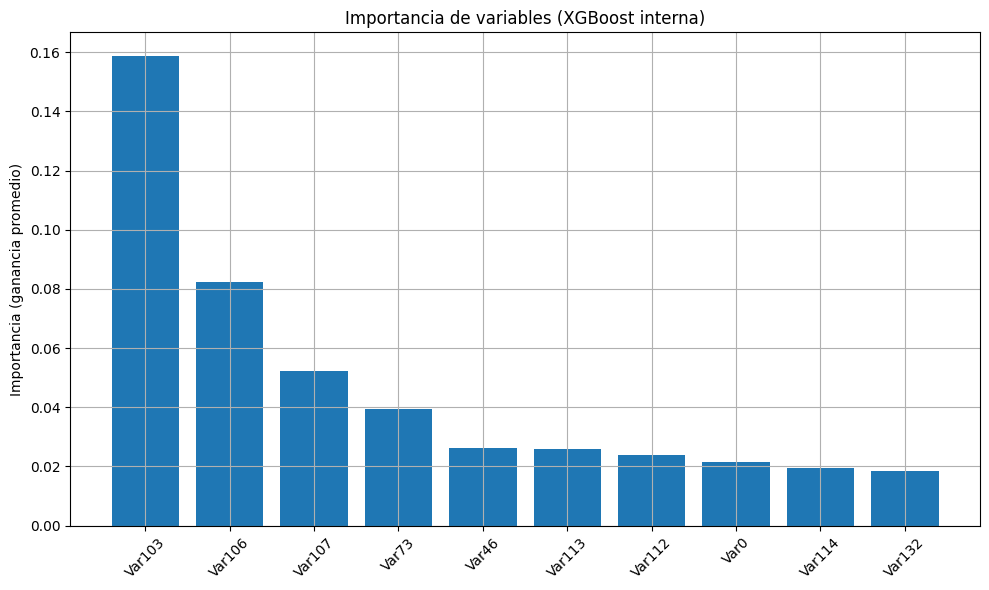

In [33]:


                                                                                       # Entrenar el modelo con los mejores hiperparámetros
final_model = XGBRegressor(
    objective='reg:squarederror',
    subsample=0.8,
    n_estimators=400,
    max_depth=10,
    learning_rate=0.05,
    colsample_bytree=1.0,
    random_state=42
)

final_model.fit(Xtrain_valid, ytrain_valid)

                                                                                       # Obtener importancia de variables del modelo
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]


try:
    feature_names = Xtrain_valid.columns
except:
    feature_names = [f"Var{i}" for i in range(Xtrain_valid.shape[1])]

                                                                                       #  Graficar las 10 más importantes
plt.figure(figsize=(10, 6))
plt.title("Importancia de variables (XGBoost interna)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.ylabel("Importancia (ganancia promedio)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:

final_model = XGBRegressor(
    objective='reg:squarederror',
    subsample=0.8,
    n_estimators=400,
    max_depth=10,
    learning_rate=0.05,
    colsample_bytree=1.0,
    random_state=42
)
final_model.fit(Xtrain_valid, ytrain_valid)


Xtest_scaled = scaler.transform(Xtest)


y_pred_train = final_model.predict(Xtrain_valid)
y_pred_test = final_model.predict(Xtest_scaled)


ytest_log = np.log1p(ytest['DIAS_ALMONEDA'].values)


mask_valid = ~np.isnan(ytest_log)


r2_train_log = r2_score(ytrain_valid, y_pred_train)
r2_test_log = r2_score(ytest_log[mask_valid], y_pred_test[mask_valid])

print("Evaluación en escala logarítmica:")
print(f"R2 entrenamiento: {r2_train_log:.4f}")
print(f"R2 prueba       : {r2_test_log:.4f}")
print(f"Diferencia      : {abs(r2_train_log - r2_test_log):.4f}")


y_pred_test_original = np.expm1(y_pred_test[mask_valid])
ytest_original = ytest['DIAS_ALMONEDA'].values[mask_valid]

r2_real = r2_score(ytest_original, y_pred_test_original)
rmse_real = np.sqrt(mean_squared_error(ytest_original, y_pred_test_original))

print("\ Evaluación en escala original:")
print(f"R2 real: {r2_real:.4f}")
print(f"RMSE   : {rmse_real:.4f}")


dummy = DummyRegressor(strategy='mean')
dummy.fit(Xtrain_valid, ytrain_valid)
r2_dummy_log = dummy.score(Xtest_scaled[mask_valid], ytest_log[mask_valid])

print(f"\ R2 Dummy (log): {r2_dummy_log:.4f}")


Evaluación en escala logarítmica:
R2 entrenamiento: 0.6545
R2 prueba       : 0.5712
Diferencia      : 0.0833
\ Evaluación en escala original:
R2 real: 0.4508
RMSE   : 99.2511
\ R2 Dummy (log): -0.0000


C:\Users\david\AppData\Local\Temp\ipykernel_6884\2447277779.py:20: RuntimeWarning: invalid value encountered in log1p
  ytest_log = np.log1p(ytest['DIAS_ALMONEDA'].values)


Tras aplicar ajustes de hiperparámetros al modelo XGBoost, se evaluó su desempeño mediante validación cruzada en el conjunto Xtrain_valid. El resultado fue un R2 promedio de 0.5636, lo que indica que el modelo es capaz de explicar aproximadamente el 56.4% de la varianza en la variable objetivo (DIAS_ALMONEDA). 

Posteriormente, el modelo fue reentrenado usando el 100% de los datos de entrenamiento (Xtrain_valid) y evaluado en el conjunto de prueba Xtest. Este modelo final mostró resultados sólidos tanto en la escala logarítmica como en la escala original.

En la escala logarítmica, donde fue entrenado, el R2 en entrenamiento fue de 0.6545, y en la prueba fue de 0.5712, con una diferencia moderada de 0.0833. Esta brecha controlada confirma que el modelo no presenta sobreajuste severo y mantiene su capacidad para generalizar a nuevos datos. El hecho de que el R2 en entrenamiento haya sido superior al obtenido durante la validación cruzada se debe a que el modelo final fue ajustado usando la totalidad de los datos de entrenamiento.

Al revertir la transformación logarítmica mediante expm1, se evaluó el rendimiento en la escala original, obteniéndose un R2 real de 0.4508, lo que indica que el modelo explica aproximadamente el 45% de la variabilidad real en el tiempo que tardan los artículos en llegar a almoneda. El RMSE fue de 99.25 días, lo que implica un error promedio cercano a 99 días. Si bien este margen puede parecer elevado, es razonable dada la dispersión natural de la variable objetivo.